# 11 - Estymacja parametrów

## Estymacja punktowa i przedziałowa

## Estymacja średniej

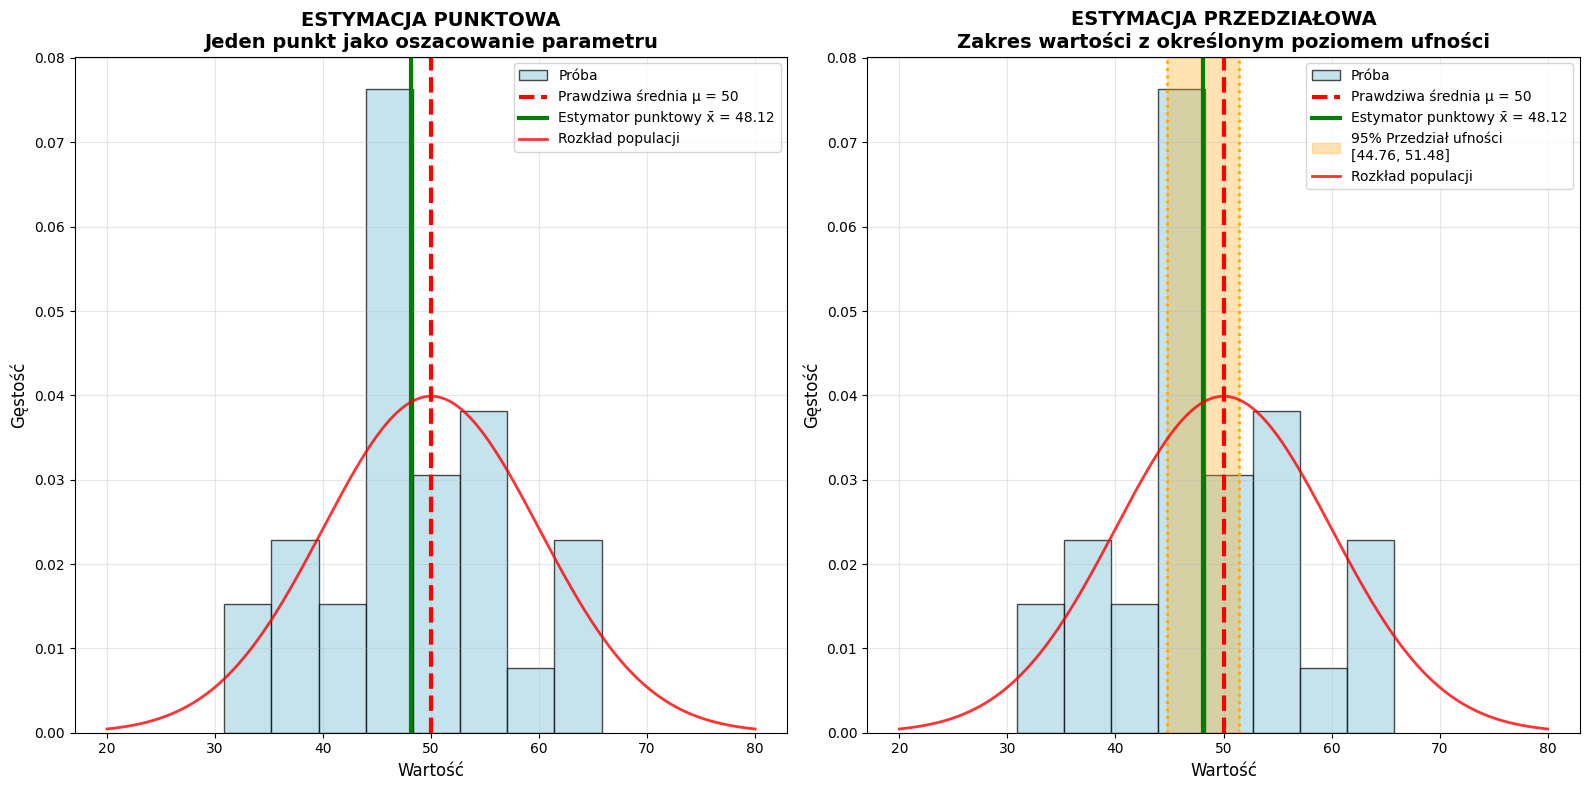

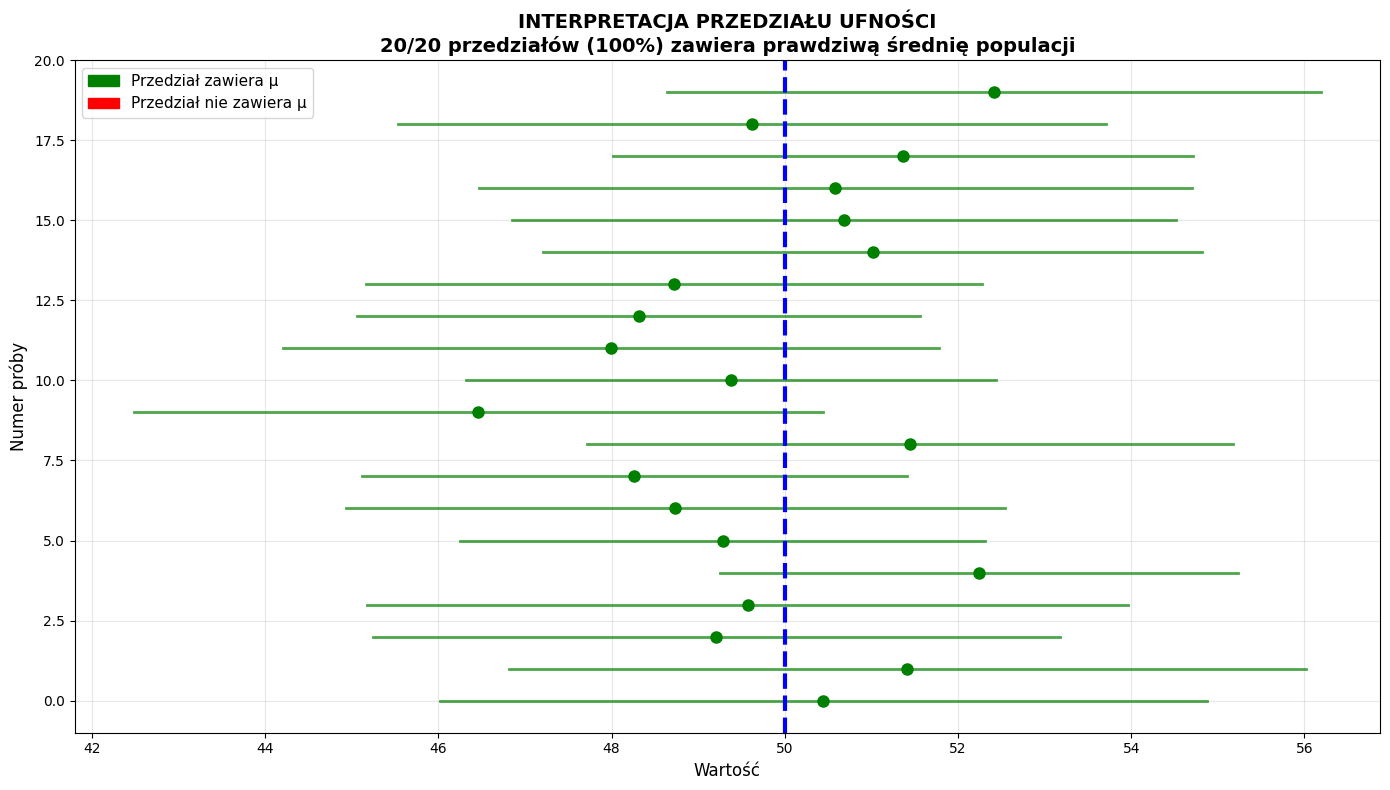

PODSTAWOWE KONCEPCJE ESTYMACJI

1. ESTYMACJA PUNKTOWA:
   • Jeden punkt jako oszacowanie parametru populacji
   • Przykład: x̄ = 48.12 jako estymator μ = 50

2. ESTYMACJA PRZEDZIAŁOWA:
   • Zakres wartości z określonym poziomem ufności
   • Przykład: 95% P.U. = [44.76, 51.48]

3. INTERPRETACJA PRZEDZIAŁU UFNOŚCI:
   • Jeśli powtórzymy procedurę 100 razy,
   • około 95 przedziałów będzie zawierało prawdziwą μ
   • W naszej symulacji: 100% przedziałów zawierało μ


In [1]:
exec(open('est_p.py').read())

### Zadanie 1.

Twoim zadaniem jest przeanalizowanie danych ankietowych dostępnych pod poniższym linkiem: surveydata3.csv. Analiza obejmuje oszacowanie średniej z przedziałami ufności, błędem standardowym, minimalną wielkością próby dla określonej dokładności oraz oszacowanie proporcji.

- Dane są ładowane z pliku CSV dostępnego pod następującym linkiem: [surveydata3.csv](https://raw.githubusercontent.com/juanspinzon/survey-data/refs/heads/main/surveydata3.csv).
- Zbiór danych zawiera 753 wiersze i 55 kolumn, w tym różne zmienne demograficzne i odpowiedzi ankietowe.
- Szczegółowy opis zbioru danych można znaleźć [tutaj](https://raw.githubusercontent.com/juanspinzon/survey-data/refs/heads/main/surveydata3_description.csv).

**Instrukcje**

**Załaduj dane:**

- Załaduj dane z pliku CSV.
- Oblicz średnią liczbę godzin snu na dobę.
- Oblicz odsetek osób, które chcą kupić gadżety Udacity.

**Oszacowanie średniej:**

- Oblicz średnią liczby godzin snu na dobę studentów Udemy.
- Oblicz przedział ufności dla średniej.
- Oblicz błąd standardowy.
- Oblicz minimalną wielkość próby wymaganą do osiągnięcia określonej dokładności (np. 3%).
- Wizualizuj wyniki za pomocą wykresu pudełkowego (średnia, błędy standardowe, przedział ufności).



2    7.0
3    7.0
4    8.0
5    6.0
6    8.0
Name: sleep hours per night, dtype: float64


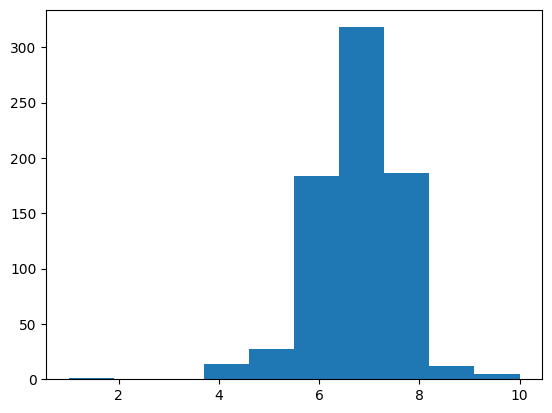

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/juanspinzon/survey-data/refs/heads/main/clean_surveydata3.xlsx?raw=true'
df = pd.read_excel(url, engine='openpyxl')
dane = df["sleep hours per night"]
dane = dane.dropna()
print(dane.head())

plt.hist(dane,bins=10);

In [ ]:
# twoje rozwiązanie tutaj

In [12]:
# Odkomentuj następującą linię, aby zobaczyć rozwiązanie:
# %load ./solutions/solution11.py

---

## Estymacja wariancji

## Dlaczego stosujemy rozkład chi-kwadrat (χ²) w estymacji wariancji?

### Podstawowe wyjaśnienie

Rozkład chi-kwadrat pojawia się naturalnie przy estymacji wariancji z bardzo konkretnego powodu matematycznego. Oto proste wyjaśnienie:

### 1. Punkt wyjścia - rozkład normalny

Jeśli mamy próbkę z rozkładu normalnego:
$$X_1, X_2, \ldots, X_n \sim N(\mu, \sigma^2)$$

### 2. Standaryzacja obserwacji

Każdą obserwację możemy wystandaryzować:
$$Z_i = \frac{X_i - \mu}{\sigma} \sim N(0,1)$$

### 3. Suma kwadratów zmiennych standardowych

Gdy podnosimy do kwadratu i sumujemy standardowe zmienne normalne:
$$\sum_{i=1}^{n} Z_i^2 = \sum_{i=1}^{n} \left(\frac{X_i - \mu}{\sigma}\right)^2 \sim \chi^2(n)$$

To już jest rozkład chi-kwadrat z $n$ stopniami swobody.

### 4. Problem w praktyce - nieznana średnia

W praktyce nie znamy $\mu$, więc używamy $\bar{X}$:
$$\sum_{i=1}^{n} \left(\frac{X_i - \bar{X}}{\sigma}\right)^2$$

### 5. Kluczowe twierdzenie Fishera

**Twierdzenie Fishera** mówi, że:
$$\frac{\sum_{i=1}^{n}(X_i - \bar{X})^2}{\sigma^2} = \frac{(n-1)s^2}{\sigma^2} \sim \chi^2(n-1)$$

gdzie:
- $s^2 = \frac{\sum_{i=1}^{n}(X_i - \bar{X})^2}{n-1}$ - wariancja próbkowa
- Tracimy jeden stopień swobody przez szacowanie średniej

### 6. Dlaczego chi-kwadrat?

Chi-kwadrat powstaje, ponieważ:

1. **Suma kwadratów**: Wariancja to średnia z kwadratów odchyleń
2. **Zmienne normalne**: Zakładamy normalność populacji
3. **Strata stopni swobody**: Szacowanie średniej "kosztuje" jeden stopień swobody

### Matematyczne uzasadnienie

#### Rozkład wariancji próbkowej:
$$\frac{(n-1)s^2}{\sigma^2} \sim \chi^2(n-1)$$

#### Gęstość chi-kwadrat:
$$f(x) = \frac{1}{2^{k/2}\Gamma(k/2)} x^{k/2-1} e^{-x/2}, \quad x \geq 0$$

gdzie $k = n-1$ to stopnie swobody.

### Praktyczne konsekwencje

#### Przedział ufności dla wariancji:
$$P\left(\chi^2_{\alpha/2, n-1} \leq \frac{(n-1)s^2}{\sigma^2} \leq \chi^2_{1-\alpha/2, n-1}\right) = 1-\alpha$$

#### Przekształcając na $\sigma^2$:
$$P\left(\frac{(n-1)s^2}{\chi^2_{1-\alpha/2, n-1}} \leq \sigma^2 \leq \frac{(n-1)s^2}{\chi^2_{\alpha/2, n-1}}\right) = 1-\alpha$$

### Właściwości rozkładu chi-kwadrat

1. **Wartości nieujemne**: $\chi^2 \geq 0$ (wariancja nie może być ujemna)
2. **Asymetria**: Rozkład jest prawostronnie skośny
3. **Wartość oczekiwana**: $E[\chi^2_k] = k$
4. **Wariancja**: $\text{Var}[\chi^2_k] = 2k$

### Warunki stosowania

Rozkład chi-kwadrat dla wariancji jest poprawny tylko gdy:
- **Populacja ma rozkład normalny**
- **Obserwacje są niezależne**
- **Próbka jest losowa**

### Intuicyjne wyjaśnienie

Wyobraź sobie, że:
1. Mierzysz odchylenia od średniej: $(X_i - \bar{X})$
2. Podnosisz je do kwadratu: $(X_i - \bar{X})^2$
3. Sumujesz wszystkie: $\sum(X_i - \bar{X})^2$

Ta suma kwadratów odchyleń, przeskalowana przez prawdziwą wariancję, ma rozkład chi-kwadrat. To naturalna konsekwencja matematyki rozkładu normalnego.

### Porównanie z rozkładem t-Studenta

| Parametr | Rozkład t | Rozkład χ² |
|----------|-----------|------------|
| **Estymacja** | Średnia $\mu$ | Wariancja $\sigma^2$ |
| **Gdy σ² jest** | Nieznana | Szacowana |
| **Statystyka** | $\frac{\bar{X}-\mu}{s/\sqrt{n}}$ | $\frac{(n-1)s^2}{\sigma^2}$ |
| **Symetryczny** | Tak | Nie (prawostronna skośność) |
| **Zakres** | $(-\infty, +\infty)$ | $[0, +\infty)$ |

### Kluczowe wnioski

- Chi-kwadrat używamy dla wariancji, bo matematycznie tak wynika z teorii
- Jedna średnia = jeden stopień swobody mniej
- Tylko dla rozkładu normalnego!
- Przedziały ufności są asymetryczne (w przeciwieństwie do średniej)

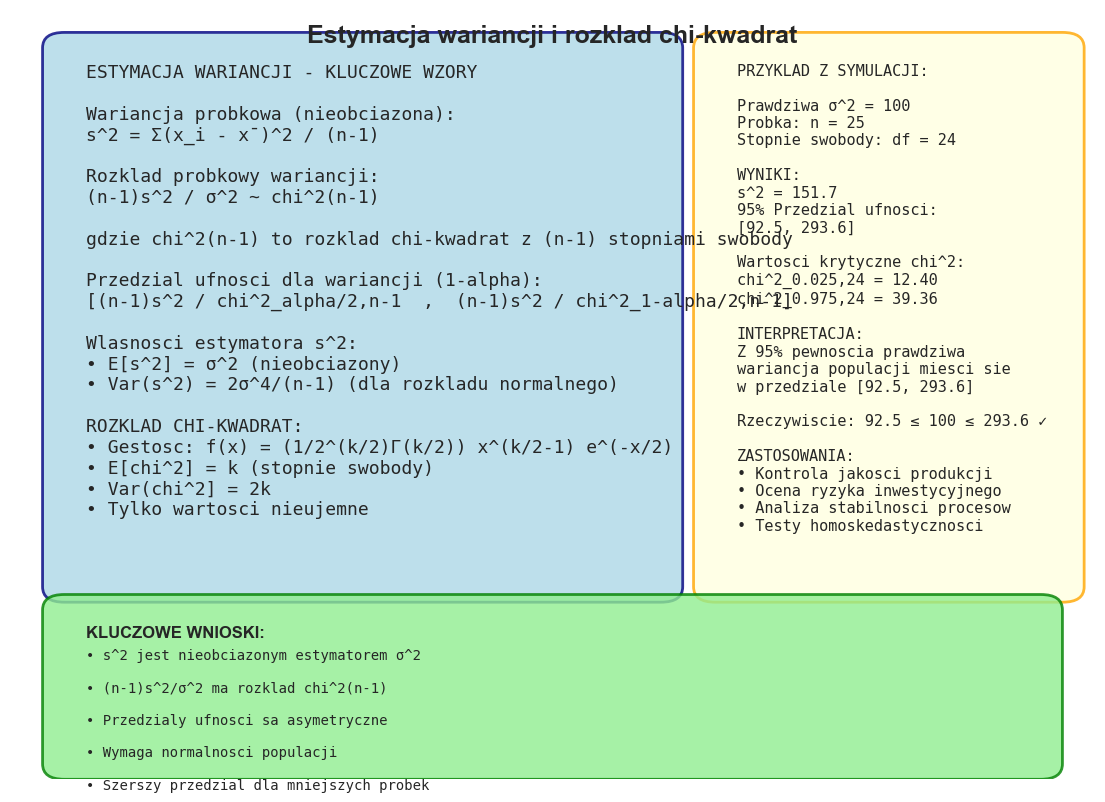

In [13]:
exec(open('est_war.py').read())

## Zadanie 2.

**Oszacowanie wariancji:**

- Oblicz wariancję i odchylenie std. liczby godzin snu na dobę studentów Udemy.
- Oblicz 95% przedział ufności dla wariancji.

In [ ]:
# twoje rozwiązanie tutaj

---

## Estymacja proporcji

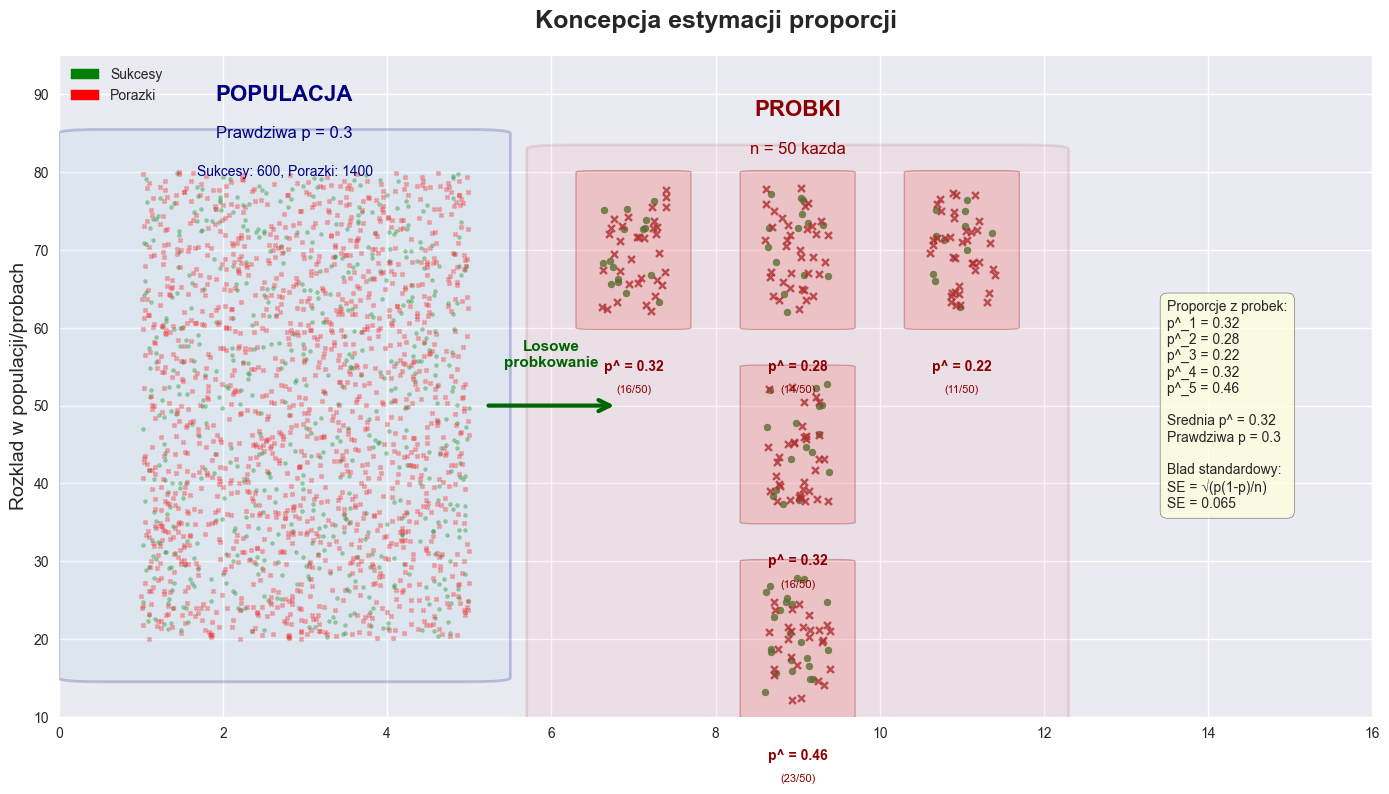

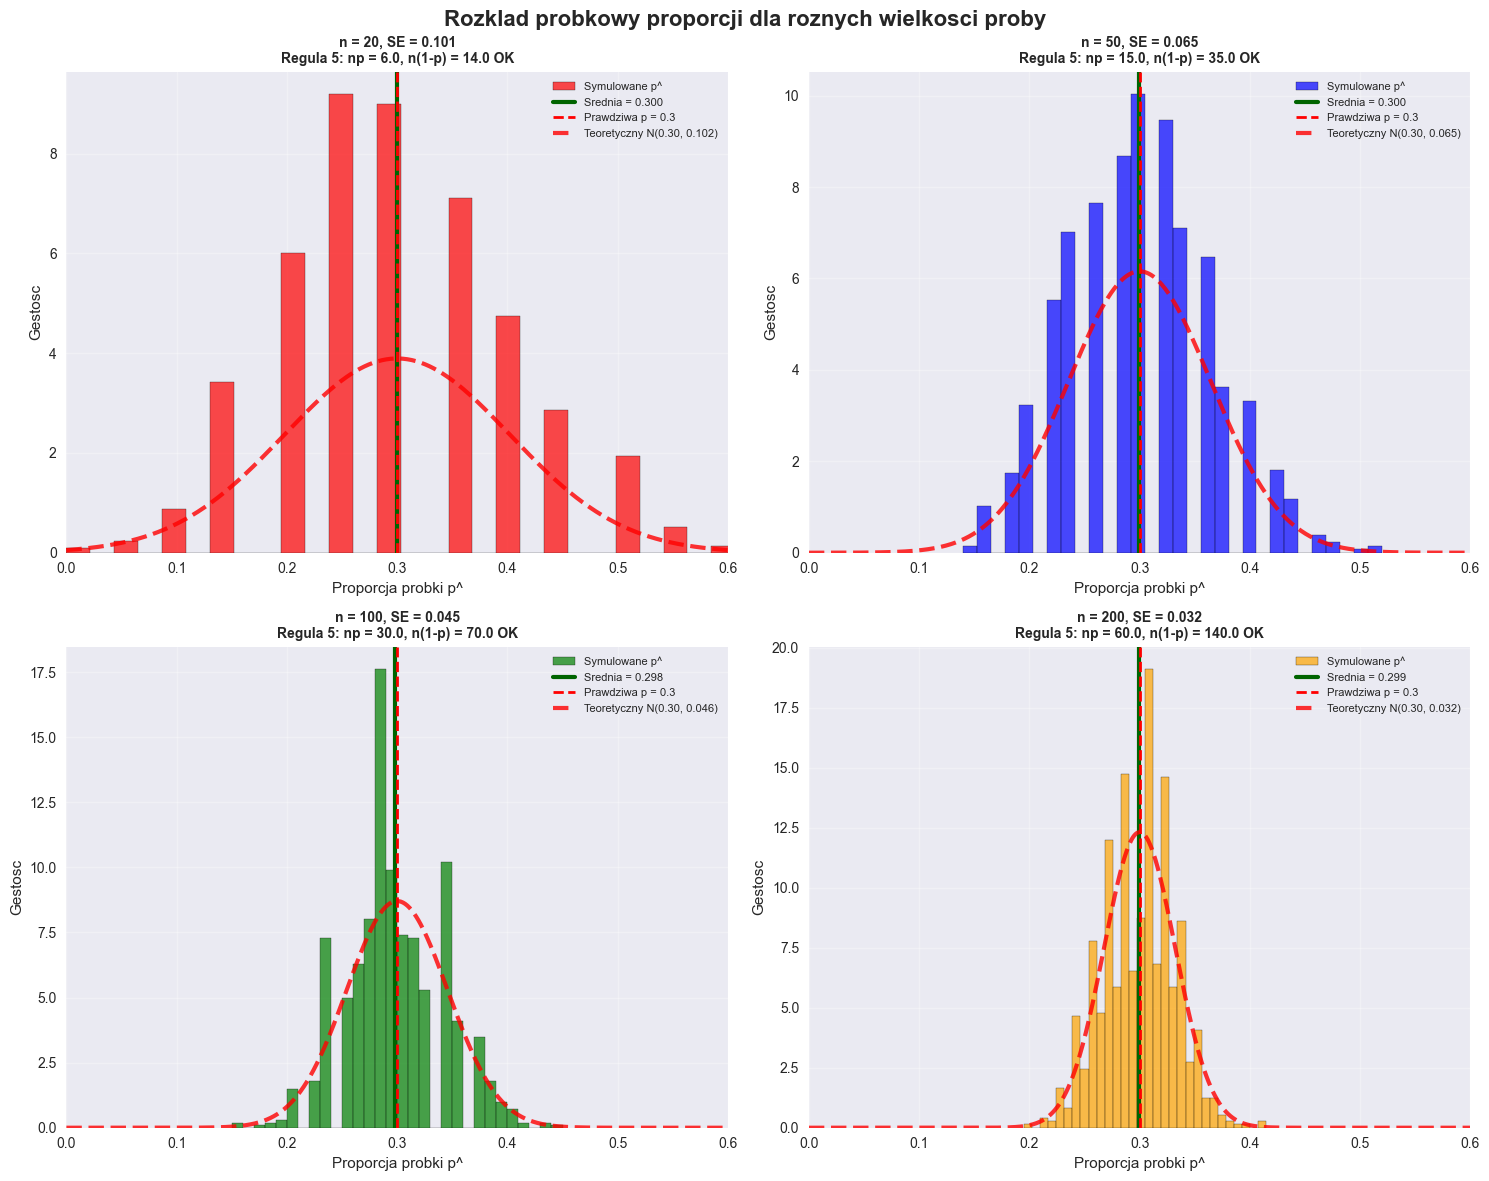

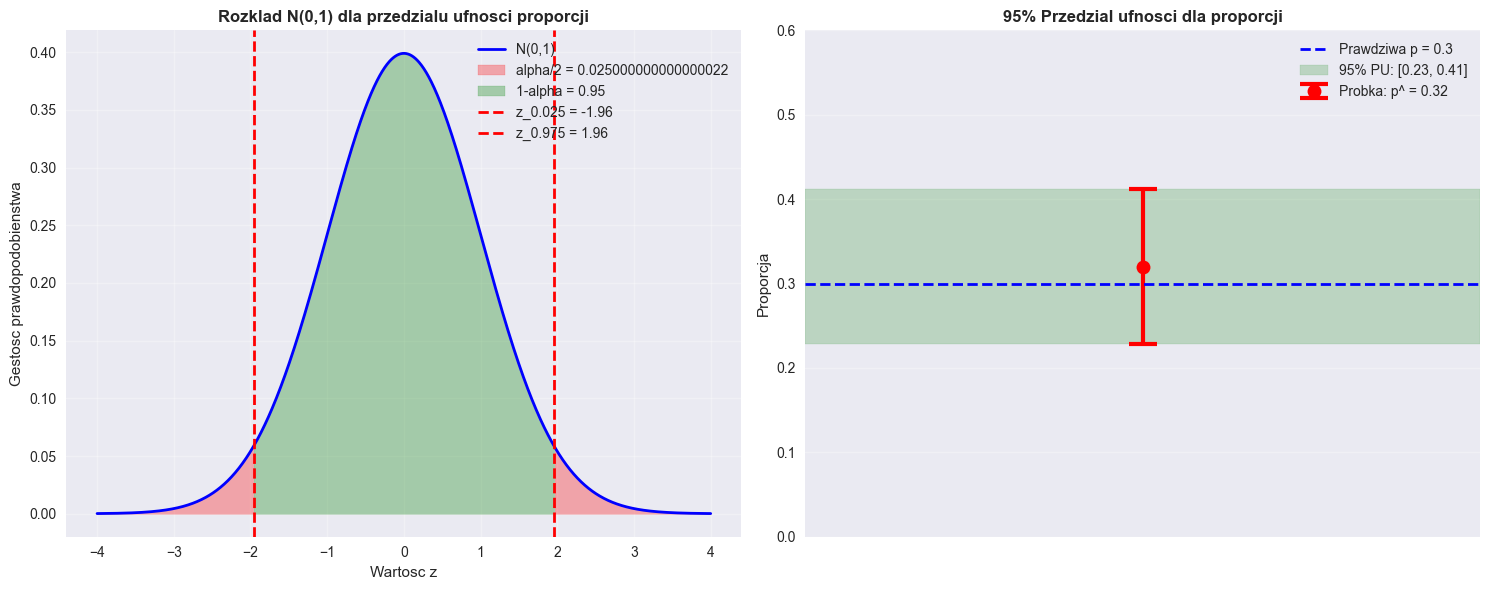

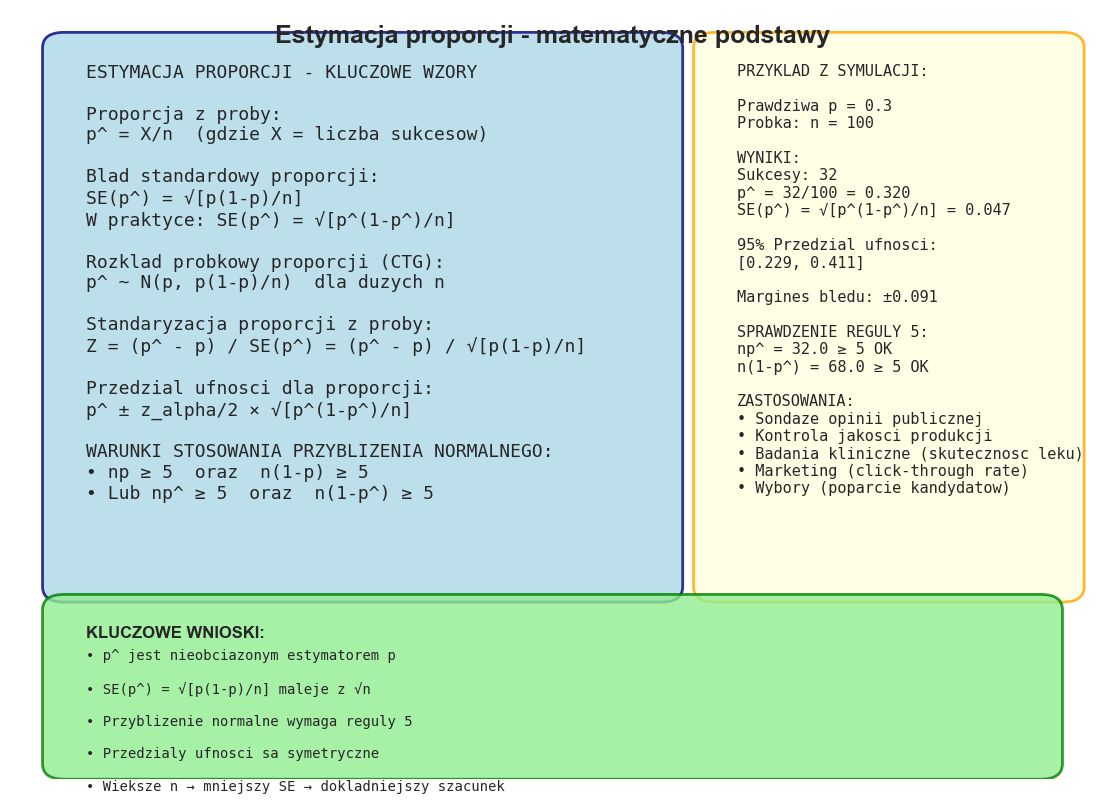

PODSUMOWANIE ESTYMACJI PROPORCJI
Prawdziwa proporcja populacji: p = 0.3
Wielkosc probki: n = 100

WYNIKI ESTYMACJI:
Liczba sukcesow: 32
Proporcja probkowa: p^ = 0.320
Blad standardowy: SE(p^) = 0.047
95% Przedzial ufnosci: [0.229, 0.411]
Margines bledu: ±0.091

SPRAWDZENIE REGULY 5:
np^ = 32.0 ≥ 5: TAK
n(1-p^) = 68.0 ≥ 5: TAK

WERYFIKACJA:
Czy przedzial zawiera prawdziwa wartosc? TAK
Szerokosc przedzialu: 0.183


In [15]:
exec(open('est_prop.py').read())

## Zadanie 3.

**Oszacowanie proporcji:**

- Oblicz proporcję osób, które chcą kupić gadżety Udacity.
- Oblicz przedział ufności dla tej proporcji.
- Oblicz błąd standardowy.
- Oblicz minimalną wielkość próby wymaganą do osiągnięcia określonej dokładności (np. 3%).
- Wizualizuj wyniki za pomocą wykresu pudełkowego (proporcja, błędy standardowe, przedział ufności).

In [ ]:
# twoje rozwiązanie tutaj

---

## Zadanie domowe

Twoim zadaniem jest przeanalizowanie danych ankietowych ["Diagnoza społeczna"](http://www.diagnoza.com) przeprowadzanych przez wiele lat w Polsce. 

Dane są ładowane z pliku CSV dostępnego w kategorii data/ankiety. W pliku **"diagnozaDict.csv"** znajdują się szczegółowe opisy pytań zadanych respondentom.

**Instrukcje**

**Załaduj dane:**

- Załaduj dane z pliku CSV.
- Oblicz średnią zmiennej "gp64" - p64 Pana/Pani własny (osobisty) dochod miesieczny netto (na reke).
- Oblicz odsetek osób, które *** (np. odpowiedziały na pytanie g54_04 "sukces w życiu odzwierciedlają posiadane dobra materialne": "ZDECYDOWANIE TAK", wg płci) *** lub inne kategoryczne wg płci.
  
**Oszacowanie średniej i odsetka:**

- Oblicz przedział ufności dla średniej i odsetka.
- Oblicz ich błędy standardowe.
- Zwizualizuj wyniki za pomocą wykresu pudełkowego (średnia, błędy standardowe, przedział ufności).

In [18]:
ankieta = pd.read_csv("data/ankiety/diagnoza.csv")
ankieta.head()

,imie_2011,waga_2013_osoby,lata_nauki_2013,wiek2013,plec,wojewodztwo,eduk4_2013,status9_2013,gp3,gp29,...,gp54_17,gp54_18,gp54_19,gp54_20,gp54_21,gp54_22,gp60,gp61,gp64,gp113
0,WERONIKA,0.277653,NaN,4.0,kobieta,Świętokrzyskie,NaN,inni bierni zawodowo,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ERNEST,0.277653,11.0,13.0,mężczyzna,Świętokrzyskie,zasadnicze zawodowe/gimanzjum,pracownicy sekt. prywatnego,UDANE,POCZUCIE SENSU,...,"ANI TAK, ANI NIE",ZDECYDOWANIE TAK,ZDECYDOWANIE NIE,ZDECYDOWANIE TAK,TAK,RACZEJ TAK,176.0,70.0,900.0,NaN
2,SYLWIA,0.277653,16.0,23.0,kobieta,Świętokrzyskie,wyższe i policealne,pracownicy sekt. prywatnego,DOSYĆ DOBRE,PRZYJEMNOSCI,...,ZDECYDOWANIE NIE,ZDECYDOWANIE TAK,ZDECYDOWANIE NIE,RACZEJ TAK,RACZEJ NIE,RACZEJ TAK,174.0,90.0,NaN,NaN
3,MARIOLA,0.277653,16.0,27.0,kobieta,Świętokrzyskie,wyższe i policealne,pracownicy sekt. prywatnego,NIEZBYT UDANE,POCZUCIE SENSU,...,RACZEJ NIE,ZDECYDOWANIE TAK,ZDECYDOWANIE NIE,TAK,RACZEJ TAK,ZDECYDOWANIE TAK,173.0,70.0,950.0,NaN
4,WACŁAW,0.475255,7.0,78.0,mężczyzna,Dolnośląskie,podstawowe i niższe,emeryci,DOSYĆ DOBRE,POCZUCIE SENSU,...,NIE,RACZEJ TAK,RACZEJ NIE,ZDECYDOWANIE TAK,RACZEJ NIE,"ANI TAK, ANI NIE",158.0,66.0,2700.0,NaN


In [ ]:
# twoje rozwiązanie tutaj

---

# Załącznik

# Przydatne funkcje Pythona w estymacji

W załączniku do tego rozdziału "funkcje_est.py" znajdziecie zestaw przydatnych funkcji Pythona, które można wykorzystać w estymacji parametrów populacji.

Zwróć uwagę, że w przypadku wizualizowania wyników wraz z estymacją - istnieje wiele rozwiązań graficznych, wedle uznania. 

In [18]:
# exec(open('funkcje_est.py').read())